In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class Perceptron(object):
    """Perceptron
    Parameters
    ------------
    eta : float
        学習率 (0.0 ~ 1.0)
    n_iter : int
        学習のイテレーション.
    shuffle : bool (default: True)
        trainingデータをepoch毎にシャッフルするかどうか.
    random_state : int (default: None)
        ランダムseed

    Attributes
    -----------
    w_ : 1d-array
        重み係数. バイアス項の重みも持つ。
    errors_ : list
        epoch毎の分類ミスの回数

    """
    def __init__(self, eta=0.01, n_iter=10,
                 shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        if random_state:
            np.random.seed(random_state)

    def fit(self, X, y):
        """
        Parameters
        ----------
        X : shape = [n_samples, n_features]
            学習用データ
            n_samples: データ数
            n_features: 特徴量(次元)数
        y : shape = [n_samples]
            正解ラベル

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            errors = 0
            for xi, target in zip(X, y):
                update = #TODO code here!!
                self.w_[1:] += update * xi
                self.w_[0] += update * 1
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def _shuffle(self, X, y):
        """学習データのシャッフル"""
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def net_input(self, X):
        """インプットの合計を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """予測ラベルを計算。0以上なら1, 0以下なら-1を返す"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [7]:
df = pd.read_csv('../datasets/iris.csv', header=None)

In [8]:
df.head(3)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [9]:
y = df.iloc[0:100, 4].values

In [10]:
# setosaの場合は-1, それ以外は1をラベル付け
y = np.where(y == 'Iris-setosa', -1, 1)

In [11]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [12]:
# sepal lengthとpetal lengthを特徴量として選択
X = df.iloc[0:100, [0, 2]].values

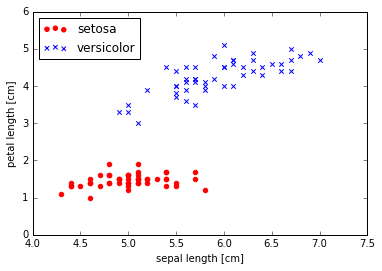

In [13]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [14]:
print("パーセプトロンによる学習開始")
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

パーセプトロンによる学習開始


境界線の描画


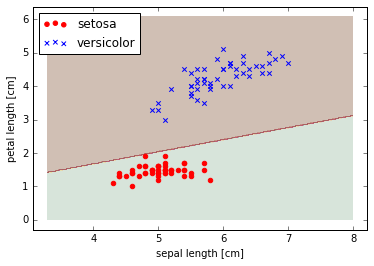

In [15]:
## 学習後の境界線描画
## ここの詳細についてはとりあえず気にしなくても大丈夫です。
print("境界線の描画")
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap="Accent")
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()